In [252]:
from IPython.display import HTML
file_path = 'homework3_part2_images/expl_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [253]:
from IPython.display import HTML
file_path = 'homework3_part2_images/stocastic.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [254]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [255]:
def sgd_optimizer(l, grad_l, w0, data, alpha, batch_size, n_epochs):
    X, y = data  # Unpack the data
    N = X.shape[1]
    d = w0.shape[0]
    idx = np.arange(0, N)
    
    # Initialization of output arrays
    w_history = []
    f_val = np.zeros((n_epochs, ))  # Save loss values at the end of each epoch
    grads = []
    err = np.zeros((n_epochs, ))  # Save gradient norms at the end of each epoch
    
    # Initialize weights
    w = w0
    
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X_shuffled = X[:, idx]
        y_shuffled = y[:, idx]
        
        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X_shuffled[:, batch_start:batch_end]
            y_batch = y_shuffled[:, batch_start:batch_end]
            
            # Compute the gradient of the loss
            #print(X_batch.shape,y_batch.shape)
            gradient = grad_l(w, X_batch, y_batch)
            
            # Update weights
            w = w - alpha * gradient
            
            # Store weights after each update
            w_history.append(w)
            
        # Compute and save loss and gradient norm after each epoch
        f_val[epoch] = l(w, X, y)
        gradient_epoch = grad_l(w, X, y)
        grads.append(gradient_epoch)
        err[epoch] = np.linalg.norm(gradient_epoch, 2)
    
    return np.array(w_history), f_val, np.array(grads), err

  

In [223]:
dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']
print("Shape of X (images):", X.shape)
print("Shape of I (labels):", I.shape)

Shape of X (images): (256, 1707)
Shape of I (labels): (1, 1707)


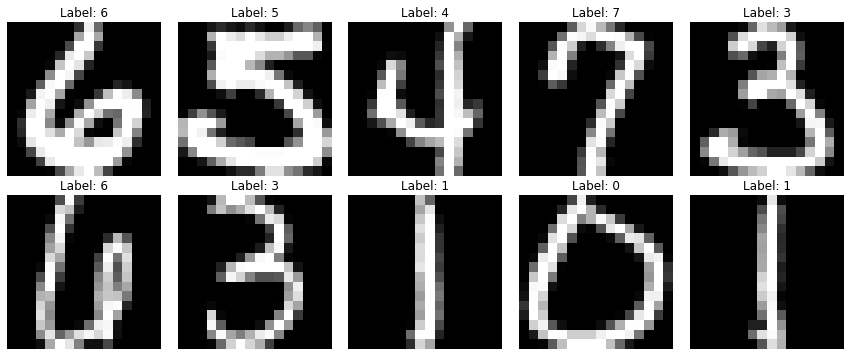

In [224]:
num_images = 10
plt.figure(figsize=(12, 5))

for i in range(num_images):
    image = X[:, i]
    image = np.reshape(image, (16, 16))
    plt.subplot(2, num_images//2, i + 1) 
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {I[0][i]}")

plt.tight_layout()
plt.show()

In [225]:
digit1 = int(input('Enter the first digit to select :'))
digit2 = int(input('Enter the second digit to select :'))
digits_cols = [i for i in range(X.shape[1]) if I[0][i] == digit1 or I[0][i] == digit2]
X = X[:,digits_cols]
I = I[:,digits_cols]
print(X.shape,I.shape)

(256, 275) (1, 275)


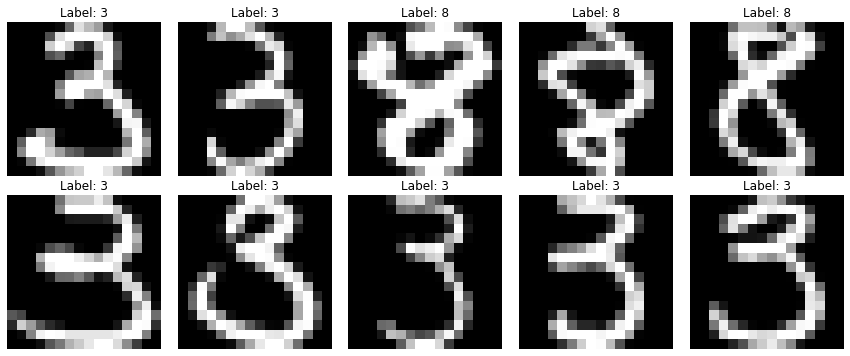

In [226]:
num_images = 10
plt.figure(figsize=(12, 5))

for i in range(num_images):
    image = X[:, i]
    image = np.reshape(image, (16, 16))
    plt.subplot(2, num_images//2, i + 1) 
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {I[0][i]}")

plt.tight_layout()
plt.show()

In [227]:
# I'm going to use a 80% of data in the dataset X for the train and 20% for the test.
#Adding bias
bias_row = np.ones((1, X.shape[1]))  
X_bias = np.concatenate([bias_row, X], axis=0)  

train_elements = int(X_bias.shape[1] * 0.8)


X_train = X_bias[:,:train_elements]
Y_train = I[:,:train_elements]

X_test = X_bias[:,train_elements:]
Y_test = I[:,train_elements:]

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(257, 220) (1, 220) (257, 55) (1, 55)


In [266]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def f(w, X):
    return sigmoid(np.dot(w.T, X))


def loss_mse(w, X, Y):
    N = X.shape[1]
    y_pred = f(w, X)
    loss = (1 / (2 * N)) * np.sum((y_pred - Y) ** 2)
    return loss

def grad_loss_mse(w, X, Y):
    N = X.shape[1]
    y_pred = f(w, X)  

    error_term = (y_pred - Y) * y_pred * (1 - y_pred)  
    if error_term.shape != (1, N):
        error_term = error_term.reshape(1, N)
        
    gradient = (1 / N) * np.dot(X, error_term.T)  

    return gradient

def convert_labels_to_binary(Y, digitA, digitB):
    Y_binary = np.where(Y == digitA, 0, 1)
    return Y_binary

# def predict(w, X, threshold=0.5):
#     prob = f(w, X)
#     predictions = [1 if p >= threshold else 0 for p in prob]
#     return predictions

def predict(w, X, threshold=0.5):
    probas = f(w, X)
    predictions = (probas >= threshold)  
    return predictions.astype(int) 


def calculate_accuracy(predictions, Y_binary):
    return np.mean(predictions == Y_binary)

In [267]:
w0 = np.zeros((X_train.shape[0], 1))
alpha = 0.1
batch_size = X_train.shape[1] // 5
n_epochs = 1000
D = (X_train, Y_train)

w_history, f_val, grads, err = sgd_optimizer(loss_mse, grad_loss_mse, w0, D, alpha, batch_size, n_epochs)

Y_test_binary = convert_labels_to_binary(Y_test, digit1, digit2)
final_w = w_history[-1]

predictions = predict(final_w, X_test)
accuracy = calculate_accuracy(predictions, Y_test_binary)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [269]:
def filter_dataset(X, Y, digits):
    indices = [i for i in range(Y.shape[1]) if Y[0][i] in digits]
    return X[:, indices], Y[:, indices]

def train_test_split(X, Y, N_train):

    idx = np.arange(0, X.shape[1])
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    X_train = X[:, train_idx]
    Y_train = Y[:,train_idx]  
    X_test = X[:, test_idx]
    Y_test = Y[:,test_idx]

    return X_train, Y_train, X_test, Y_test

dataset = scipy.io.loadmat('MNIST.mat')
X = dataset['X']
I = dataset['I']
print("Shape of X (images):", X.shape)
print("Shape of I (labels):", I.shape)
digits_to_test = [(0, 1), (2, 3), (4, 5)]
batch_sizes = [32, 64, 128]
training_percentages = [0.5, 0.7, 0.9]
results = {}
bias_row = np.ones((1, X.shape[1]))  
X = np.concatenate([bias_row, X], axis=0) 
n_epochs = 10
alpha = 0.001


for digits in digits_to_test:
    digitA, digitB = digits
    results[digits] = {}
    X_copy = X.copy()
    I_copy = I.copy()
    X_filtered, Y_filtered = filter_dataset(X_copy, I_copy, digits)
    print(f"Filtered Data for digits {digits}: X_filtered.shape = {X_filtered.shape}, Y_filtered.shape = {Y_filtered.shape}")

    for percentage in training_percentages:
        N_train = int(percentage * X_filtered.shape[1])
        X_train, Y_train, X_test, Y_test = train_test_split(X_filtered, Y_filtered, N_train)
        print(f"Data Split: X_train.shape = {X_train.shape}, Y_train.shape = {Y_train.shape}, X_test.shape = {X_test.shape}, Y_test.shape = {Y_test.shape}")

        for batch_size in batch_sizes:
            results[digits][batch_size] = {}
            for percentage in training_percentages:
                w_history, f_val, grads, err = sgd_optimizer(loss_mse, grad_loss_mse, w0, (X_train, Y_train), alpha, batch_size, n_epochs)
                final_w = w_history[-1]
                #print(f"Final Weights for batch_size = {batch_size}, percentage = {percentage}: {final_w}")

                Y_test_binary = convert_labels_to_binary(Y_test, digitA, digitB)
                print(f"Binary Labels: {Y_test_binary[:10]}")  
                predictions = predict(final_w, X_test)
                
                accuracy = calculate_accuracy(predictions, Y_test_binary)
                print(f"Accuracy for digits {digitA}, {digitB} with batch size {batch_size} and training percentage {percentage}: {accuracy}")

                results[digits][batch_size][percentage] = accuracy

print(results)


Shape of X (images): (256, 1707)
Shape of I (labels): (1, 1707)
Filtered Data for digits (0, 1): X_filtered.shape = (257, 571), Y_filtered.shape = (1, 571)
Data Split: X_train.shape = (257, 285), Y_train.shape = (1, 285), X_test.shape = (257, 286), Y_test.shape = (1, 286)
Binary Labels: [[0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0
  1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
  0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0
  1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0
  0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0
  1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1
  0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
  0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1]]
Accuracy for digits 0, 1 with batch size 32 and training percentage 0.5: 0.9965034965034965
Binary Labels: [[0 1 1 1 0 1 0